Presence = 1
Absence = 0

In [64]:
#librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
#lectura del dataset y encabezado del mismo
train = pd.read_csv("data/train.csv")
train.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [66]:
#info general del dataset
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Heart Disease  

# Limpieza

Para la limpieza de este dataset, se considera estandarizar el nombre de las columnas a snake_case y lowercase, además de hacer este mismo cambia para cada columna categorica para evitar confunciones a la hora de analizar el dataset. Además, se considera tener cada columna con 2 valores unicos excluyentes entre sí como un booleano de tipo entero(0 o 1). También se considera la limpieza de datos repetidos y nulos en caso de que existan.

In [67]:
#snake_case para el nombre de las columnas y algunos datos categoricos

train.columns = train.columns.str.strip().str.lower().str.replace(r"[-/\s+]", "_", regex=True)
train["heart_disease"] = train["heart_disease"].str.strip().str.lower().str.replace(r"[-/\s+]", "_", regex=True)
train.head()

,id,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,presence


In [68]:
#busqueda de duplicados
train.duplicated().value_counts()

False    630000
Name: count, dtype: int64

In [69]:
#busqueda de duplicados por id
train.duplicated(["id"]).value_counts()


False    630000
Name: count, dtype: int64

In [70]:
#busqueda de duplicados por todas las columnas exceptuando id
train.duplicated(subset=train.columns.drop("id"), keep=False).value_counts()

False    630000
Name: count, dtype: int64

In [71]:
# cambio de tipo de dato de la columna id para evitar su modificación en el proceso de analisis
train["id"] = train["id"].astype("str")
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  str    
 1   age                      630000 non-null  int64  
 2   sex                      630000 non-null  int64  
 3   chest_pain_type          630000 non-null  int64  
 4   bp                       630000 non-null  int64  
 5   cholesterol              630000 non-null  int64  
 6   fbs_over_120             630000 non-null  int64  
 7   ekg_results              630000 non-null  int64  
 8   max_hr                   630000 non-null  int64  
 9   exercise_angina          630000 non-null  int64  
 10  st_depression            630000 non-null  float64
 11  slope_of_st              630000 non-null  int64  
 12  number_of_vessels_fluro  630000 non-null  int64  
 13  thallium                 630000 non-null  int64  
 14  heart_disease  

In [72]:
#columnas con 2 valores unicos
for i in train.columns:
    if train[i].nunique() == 2:
        print(i)
        print(train[i].unique())
        print("\n")

sex
[1 0]


fbs_over_120
[0 1]


exercise_angina
[1 0]


heart_disease
<StringArray>
['presence', 'absence']
Length: 2, dtype: str




In [73]:
#reemplazo de ['presence','absence'] por [1,0]
train["heart_disease"] = train["heart_disease"].str.replace("presence","1").str.replace("absence", "0").astype("int32")
train["heart_disease"].unique()


array([1, 0], dtype=int32)

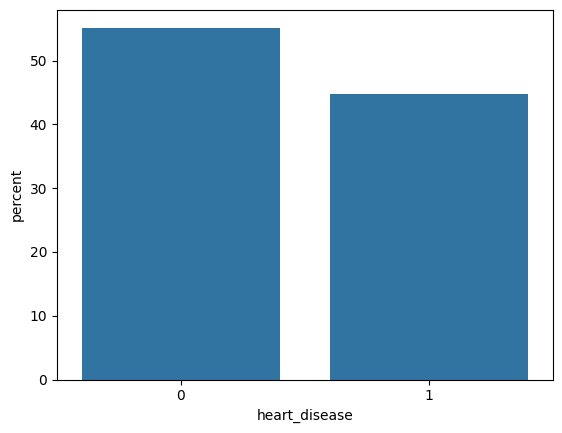

In [74]:
sns.countplot(data= train, x= "heart_disease", stat= "percent")
plt.show()

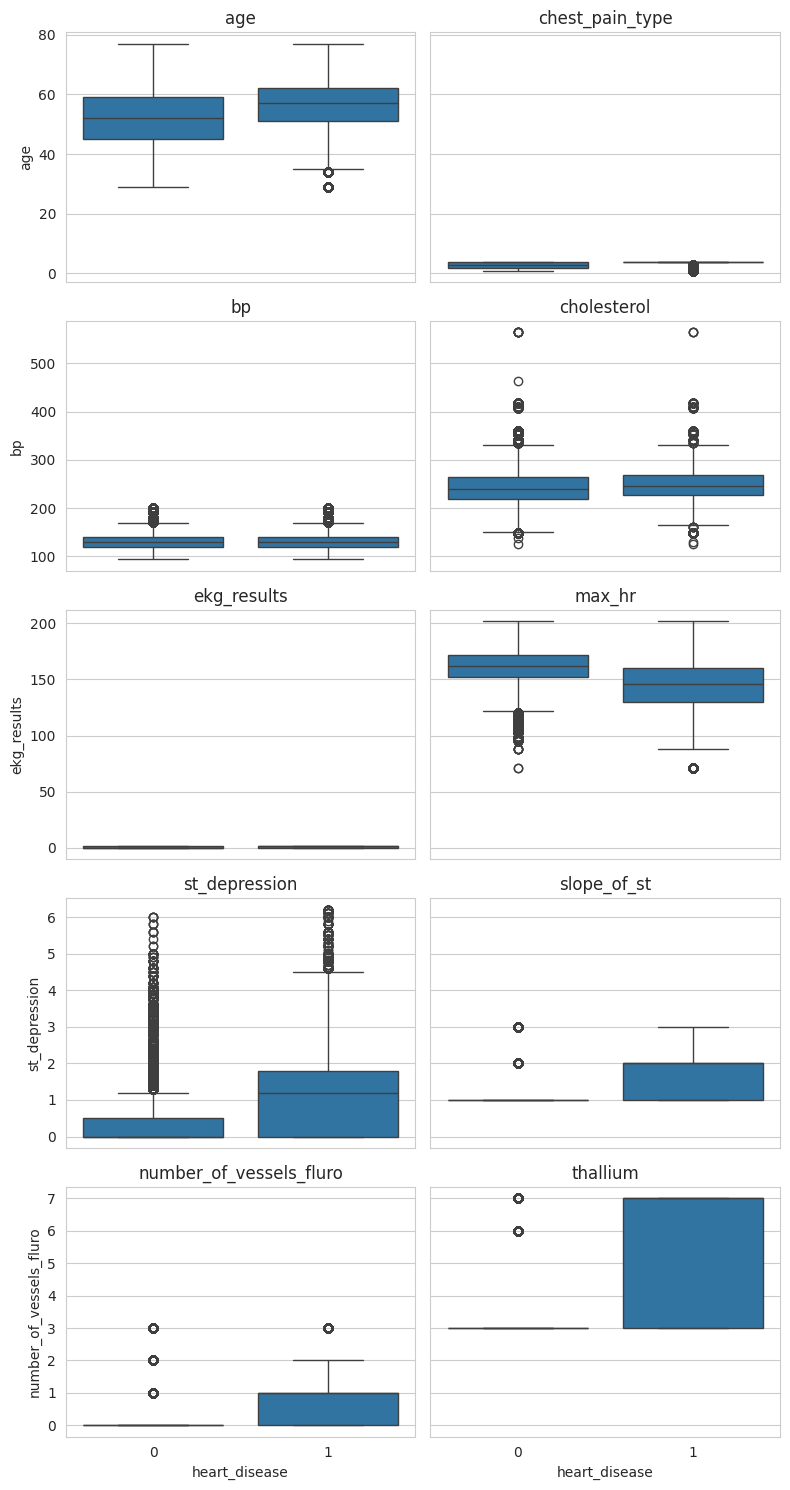

In [92]:
non_categorical_columns = list(train.columns)
categorical_columns= ["sex", "fbs_over_120" , "exercise_angina", "heart_disease", "id"]
non_categorical_columns = [x for x in non_categorical_columns if x not in categorical_columns]

fig, axes = plt.subplots(5,2, figsize = (8,15), sharex="col", sharey= "row")

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x = "heart_disease",data = train, y = non_categorical_columns[i], ax=ax)
    ax.set_title(non_categorical_columns[i])
    ax.label_outer()  
plt.tight_layout()
plt.show()
#sns.set_style("whitegrid")

#sns.boxplot(data= train,y = "bp")
#plt.show()


In [87]:
len(non_categorical_columns)

11